# 특정한 1개의 위치의 패치의 어텐션 경향 추출
TP, TN, FP, FN 4가지 상황에서 특정한 패치의 위치를 입력으로 받고 그 패치의 어텐션 값의 경향을 그래프로 추출합니다.

14*14크기의 어텐션 맵에서 index는 가장 위쪽이 x가 0, 가장 왼쪽이 y가 0입니다.

### Import Libraries

In [37]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob

from vit_rollout import VITAttentionRollout

### Definition

In [38]:
def draw_img(model, PATH_data_list, label):
    attention_list = list()
    data_number_list = list()
    for PATH_data in PATH_data_list:
        data_number = PATH_data.split('/')[-1].split('.')[0].split('\\')[-1]
        data_number_list.append(int(data_number))
        
        # Load data: using CPU
        with open(PATH_data, 'rb') as f:
            data = pickle.load(f)

        input_tensor = data['tensor']
        input_tensor = input_tensor.reshape((1,14,28,28))
        input_tensor = input_tensor.to(torch.float32).cpu()

        # Rollout attentions
        attention_rollout = VITAttentionRollout(model, head_fusion='max', discard_ratio=0.90)
        mask_law = attention_rollout(input_tensor) # (14, 14)
        attention_list.append(mask_law)

        np.set_printoptions(precision=4, formatter={'float': lambda x: "{0:0.3f}".format(x)}, linewidth=np.Inf)
        f = open("../../output/attention_logical/"+label+"_"+data_number+".txt", 'w')
        f.write(str(mask_law))
        f.close()

    return attention_list, data_number_list

In [39]:
def plot_attention(attention_list, x, y, data_number_list, label):
    attentions = list()
    for i in range(len(attention_list)):
        attentions.append(attention_list[i][x][y])

    fig, ax = plt.subplots()

    ax.set_title(label+" X:"+str(x)+" Y:"+str(y))

    ax.set_ylim(0, 1.1) # express y in range 0 to 1.1 

    ax.set_xlabel('frame number')
    ax.set_ylabel('attention')

    ax.set_xticks(data_number_list)
    ax.set_yticks([y*0.1 for y in range(0,11)])

    ax.plot(data_number_list, attentions)

    ax.grid()

    fig.set_figwidth(2000/fig.dpi)
    fig.set_figheight(700/fig.dpi)
    fig.show()

### Load Data Path

In [40]:
# 285~325
PATH_sample_data_TP_list = glob.glob("../../dataset/data_preprocessed/Vulner/21-12-01-11-41-59_end_extract_drive8/*")

# 300~350
PATH_sample_data_TN_list = glob.glob("../../dataset/data_preprocessed/None-crash/21-12-01-11-07-44_end_extract_drive3/*")

# 95~115
PATH_sample_data_FP_list = glob.glob("../../dataset/data_preprocessed/None-crash/21-12-29-11-04-19_end_extract_drive14/*") 

# 290~305 -> start with 292
PATH_sample_data_FN_list = glob.glob("../../dataset/data_preprocessed/Vulner/21-12-14-15-04-44_end_extract_drive2/*") 

PATH_sample_data_TN_list = PATH_sample_data_TN_list[297:347+1]
PATH_sample_data_FP_list = PATH_sample_data_FP_list[92:112+1]

model = model = torch.load('../../model/model19.pt').cpu()

### Get Input

In [41]:
x, y = 0, 4
label = 'TP'
PATH_data_list = PATH_sample_data_TP_list

### Generate Graph

C:\Users\Seo Jungwook\AppData\Local\Temp\ipykernel_25004\3246544874.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


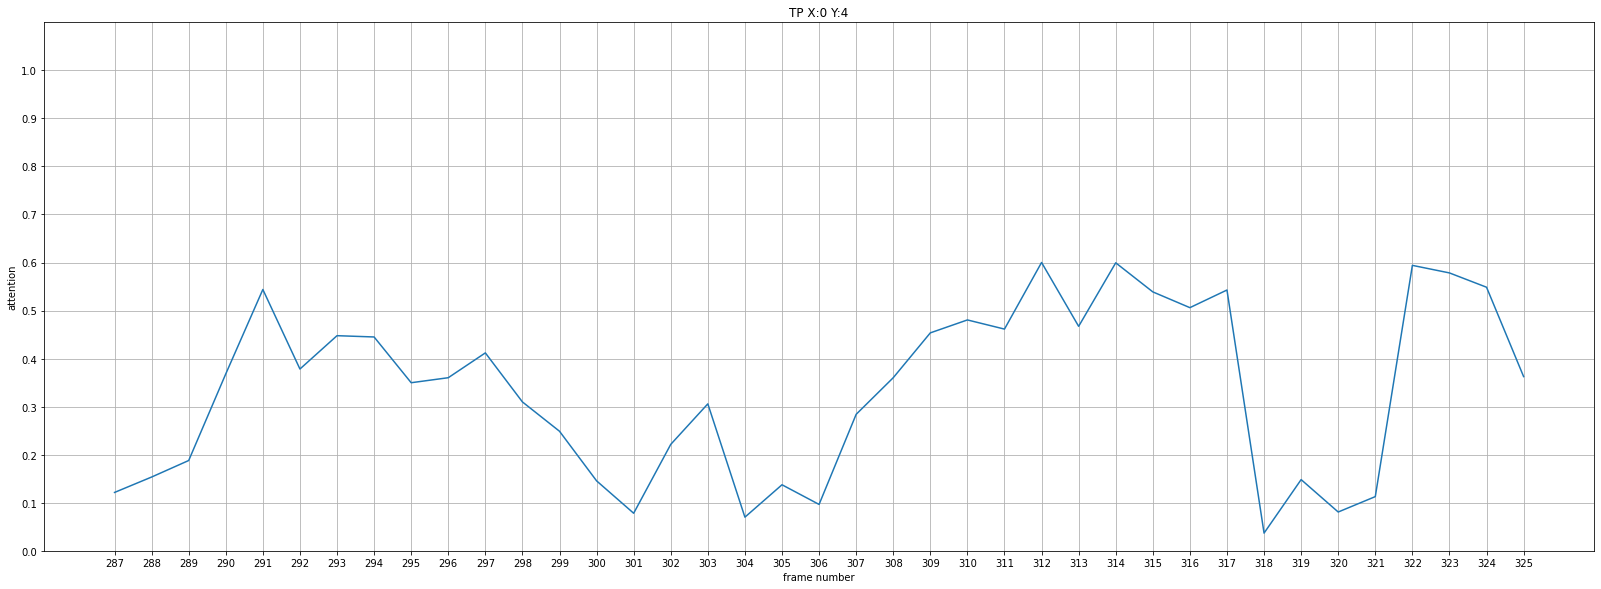

In [42]:
attention_list, data_number_list = draw_img(model=model, PATH_data_list=PATH_data_list, label=label)
plot_attention(attention_list=attention_list, x=x,y=y,data_number_list=data_number_list, label=label)